## Problem solution using PyGAD package

In [6]:
import numpy as np
from fitness import fitness_max_energy_production
from genetic_algorithm import *
from plotting import *
from utils import is_layout_valid

In [7]:
# set figsize and dpi for all figures
saved_figure_figsize, saved_figure_dpi = plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"]
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 90

In [8]:
# PROBLEM CONSTANTS
n_turbines = 9
area_size = 1600
min_spacing = 300
wind_speed = 9.8
wind_direction = 300.0
fitness_weights = {
        'energy_production': 1,
        'boundary_fitness': 0.4,
        'spacing_fitness': 0.4,
        'wake_fitness': 0.2,
        'is_valid': 2,
    }

In [9]:
# evaluate_fitness

In [10]:
# GA SETTINGS
max_generations = 100
population_size = 100
max_stagnation = 10
mutation_rate = 0.01

ga_config = {
    'n_turbines': n_turbines,
    'area_size': area_size,
    'min_spacing': min_spacing,
    'wind_speed': wind_speed,
    'wind_direction': wind_direction,
    'fitness_weights': fitness_weights,
    'population_size': population_size,
    'max_generations': max_generations,
    'max_stagnation': max_stagnation,
    'mutation_rate': mutation_rate,

}

In [11]:
solutions_best_fitness_values = []
solutions_best_layouts = []
solutions_max_fitness_values = []
solutions_avg_fitness_values = []
solutions_layouts = []
num_simulations = 10
for i in range(num_simulations):
    print(f"SIMULATION {i+1}")
    (best_fitness, best_layout), (fitness_max_values, layouts), fitness_avg_values = genetic_algorithm(ga_config)
    solutions_best_fitness_values.append([i+1, best_fitness])
    solutions_best_layouts.append(best_layout)
    solutions_max_fitness_values.append(fitness_max_values)
    solutions_avg_fitness_values.append(fitness_avg_values)
    solutions_layouts.append(layouts)

ITERATION 1
>>> Generation 0
>>>>>> new best result -20.45952331671828
>>> Generation 1
>>> Generation 2
>>> Generation 3
>>>>>> new best result 15.800925757133538
>>> Generation 4
>>>>>> new best result 19.85000000000001
>>> Generation 5
>>> Generation 6
>>> Generation 7
>>> Generation 8
>>> Generation 9
>>> Generation 10
>>> Generation 11
>>> Generation 12
>>> Generation 13
>>>>>> new best result 20.550000000000004
>>> Generation 14
>>> Generation 15
>>>>>> new best result 21.250000000000007
>>> Generation 16
>>> Generation 17
>>> Generation 18
>>> Generation 19
>>> Generation 20
>>> Generation 21
>>> Generation 22
>>> Generation 23
>>> Generation 24
>>> Generation 25
Terminating due to stagnation at generation 26.

Best result found: P = 21.250000000000007 MW
Best turbines layout found: [(57, 39), (210, 174), (223, 3), (153, 75), (129, 168), (255, 109), (285, 39), (215, 284), (264, 179), (285, 274), (69, 195), (72, 96), (0, 63), (240, 223)]
Generation of best result 15
-------------

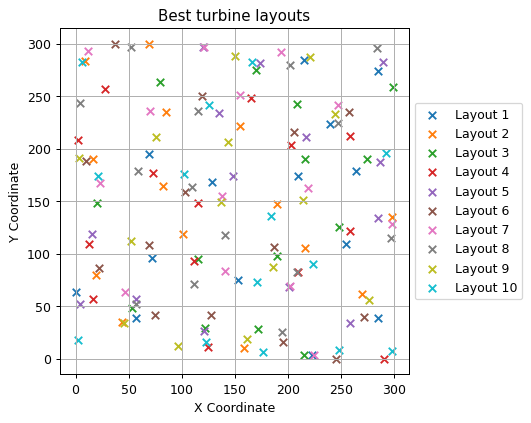

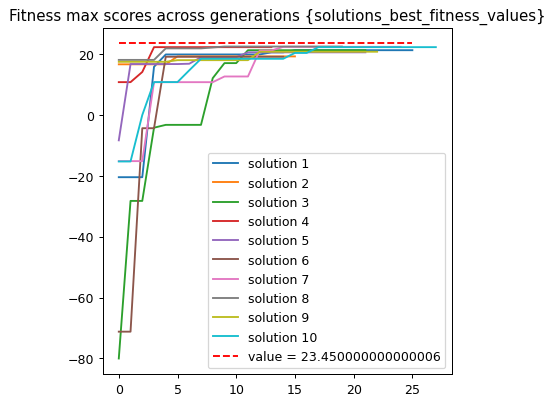

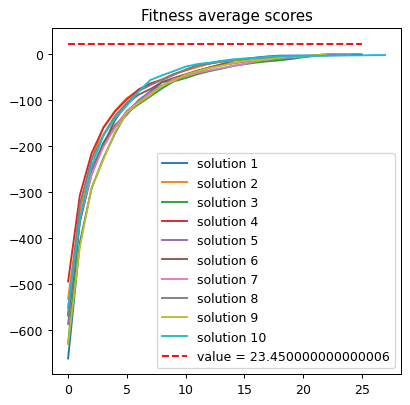

In [17]:
plot_multiple_layouts(solutions_best_layouts, title=f'Best turbine layouts')
# for i, layouts in enumerate(solutions_layouts):
#     plot_multiple_layouts(layouts[::10], title=f'Turbine layouts {i + 1}', alpha_ascending=True)

plot_solutions_data_stats(solutions_max_fitness_values,
                          title='Fitness max scores across generations {solutions_best_fitness_values}',
                          axhline=global_best_solution)
plot_solutions_data_stats(solutions_avg_fitness_values,
                          title='Fitness average scores', axhline=global_best_solution)


In [20]:
valid_solutions = []
for i, (layout, (_, score)) in enumerate(zip(solutions_best_layouts, solutions_best_fitness_values)):
    valid = is_layout_valid(layout, area_size, min_spacing)
    print(f"solution {i+1} valid:", valid, ", score:", score)
    if valid:
        valid_solutions.append([layout, score])

solution 1 valid: True , score: 21.250000000000007
solution 2 valid: False , score: 19.21110216386258
solution 3 valid: False , score: 21.236409235671058
solution 4 valid: True , score: 22.250000000000007
solution 5 valid: True , score: 20.550000000000004
solution 6 valid: False , score: 19.098835350125036
solution 7 valid: True , score: 22.350000000000005
solution 8 valid: True , score: 22.450000000000006
solution 9 valid: True , score: 20.750000000000007
solution 10 valid: True , score: 22.250000000000007


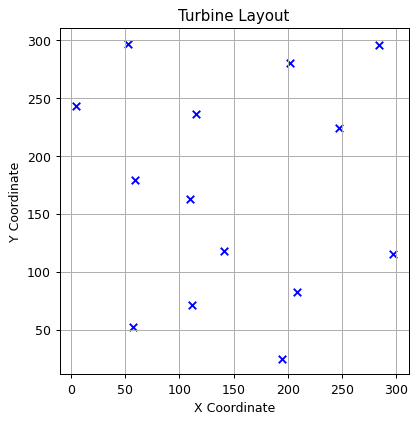

Best solution fitness:  22.450000000000006
Fitness max energy production:  23.450000000000006
solution/max_energy_production: 95.73560767590618 %


In [24]:
if valid_solutions:
    single_best_layout, single_best_fitness = max(valid_solutions, key=lambda x: x[1])
    plot_turbine_layout(single_best_layout)
    
    max_energy_production = fitness_max_energy_production(single_best_layout, fitness_weights, wind_speed)
    print("Best solution fitness: ", single_best_fitness)
    print("Fitness max energy production: ", max_energy_production)
    print(f"solution/max_energy_production: {single_best_fitness/max_energy_production * 100} %")
else:
    print("No valid solutions")


global_best_solution:  23.450000000000006
